In [1]:
import datetime, calendar, random, math, copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from haversine import haversine

### User input

In [2]:
datetime.date.today()

datetime.date(2019, 8, 21)

In [2]:
user_input = {
    'user_id': '-hJ9Q0OSYqdOTVBLOMdg7A',
    #'history': ['NG2mL-wQQfBdsXsyUbw8pA',
    #            'pomGBqfbxcqPv14c3XH-ZQ',
    #            'qJEtXdrOQeo9py0Wqr6LKQ',
    #            'UDE4VL0k8Zrko7RkJ4agGQ',
    #            'FNe5PPA9pyj8FjcDefCBpg',
    #            '2iTsRqUsPGRH1li1WVRvKQ'],
    'location': (36.1699, -115.1398),
    'date': datetime.date.today(),
    'start_time': 11,
    'end_time': 19,
    'categories': ['restaurants', 'museums', 'coffee', 'casinos', 'tours', 'active', 'arts'],
    'walking': 1,
    'new_reco': 1
        }

In [3]:
r = pd.read_csv("r_ph_lv.csv", index_col="review_id")

FileNotFoundError: [Errno 2] File b'r_ph_lv.csv' does not exist: b'r_ph_lv.csv'

### Read in recommendation results

In [5]:
reco_restaurants = pd.read_csv("recommendation_-hJ9Q0OSYqdOTVBLOMdg7A.csv", index_col="business_id")

In [6]:
reco_restaurants.sort_values(by=["score_cf"], ascending=False)

,name,categories_clean,score_cf,score_hybrid,stars,price,postal_code,latitude,longitude,monday,tuesday,wednesday,thursday,friday,saturday,sunday
business_id,,,,,,,,,,,,,,,,
4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,"['Steakhouses', 'Breakfast & Brunch', 'French']",5.649266,4.313279,4.0,2.0,89109.0,36.112827,-115.172581,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-0:0,7:0-0:0,7:0-23:0
RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Breakfast & Brunch']",5.647262,4.307117,4.0,3.0,89109.0,36.116113,-115.176222,7:30-22:0,7:30-22:0,7:30-22:0,7:30-22:0,7:30-22:0,8:0-22:0,8:0-22:0
K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,"['Buffets', 'Breakfast & Brunch']",5.446466,3.647002,3.5,3.0,89109.0,36.109550,-115.176155,8:0-21:0,8:0-21:0,8:0-21:0,8:0-21:0,8:0-22:0,8:0-22:0,8:0-21:0
f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,"['Breakfast & Brunch', 'American (New)']",5.282327,3.210486,4.0,2.0,89109.0,36.118181,-115.171580,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
DkYS3arLOhA8si5uUEmHOw,Earl of Sandwich,"['Sandwiches', 'Wraps', 'Caterers', 'Soup', 'E...",5.198884,2.995601,4.5,1.0,89109.0,36.109443,-115.171869,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
2weQS-RnoOBhb1KsHKyoSQ,The Buffet,['Buffets'],5.040439,2.651347,3.5,3.0,89109.0,36.126887,-115.165590,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30
ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,"['Buffets', 'American (New)']",4.999582,2.573177,3.5,3.0,89109.0,36.113220,-115.176890,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0
iCQpiavjjPzJ5_3gPD5Ebg,Secret Pizza,['Pizza'],4.981550,2.535069,4.0,1.0,89109.0,36.109837,-115.174212,11:0-5:0,11:0-4:0,11:0-4:0,11:0-4:0,11:0-5:0,11:0-5:0,11:0-5:0
hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"['Asian Fusion', 'Barbeque', 'Korean', 'Japane...",4.947002,2.492569,4.5,2.0,89169.0,36.108898,-115.151261,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0


In [7]:
reco_restaurants.sort_values(by=["score_hybrid"], ascending=False, inplace=True)

In [8]:
reco_restaurants.rename(columns={"score_hybrid": "score"}, inplace=True)

In [9]:
reco_restaurants.drop(["score_cf"], axis=1, inplace=True)

In [10]:
reco_restaurants

,name,categories_clean,score,stars,price,postal_code,latitude,longitude,monday,tuesday,wednesday,thursday,friday,saturday,sunday
business_id,,,,,,,,,,,,,,,
4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,"['Steakhouses', 'Breakfast & Brunch', 'French']",4.313279,4.0,2.0,89109.0,36.112827,-115.172581,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-0:0,7:0-0:0,7:0-23:0
RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Breakfast & Brunch']",4.307117,4.0,3.0,89109.0,36.116113,-115.176222,7:30-22:0,7:30-22:0,7:30-22:0,7:30-22:0,7:30-22:0,8:0-22:0,8:0-22:0
K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,"['Buffets', 'Breakfast & Brunch']",3.647002,3.5,3.0,89109.0,36.109550,-115.176155,8:0-21:0,8:0-21:0,8:0-21:0,8:0-21:0,8:0-22:0,8:0-22:0,8:0-21:0
f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,"['Breakfast & Brunch', 'American (New)']",3.210486,4.0,2.0,89109.0,36.118181,-115.171580,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
DkYS3arLOhA8si5uUEmHOw,Earl of Sandwich,"['Sandwiches', 'Wraps', 'Caterers', 'Soup', 'E...",2.995601,4.5,1.0,89109.0,36.109443,-115.171869,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
2weQS-RnoOBhb1KsHKyoSQ,The Buffet,['Buffets'],2.651347,3.5,3.0,89109.0,36.126887,-115.165590,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30
ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,"['Buffets', 'American (New)']",2.573177,3.5,3.0,89109.0,36.113220,-115.176890,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0
iCQpiavjjPzJ5_3gPD5Ebg,Secret Pizza,['Pizza'],2.535069,4.0,1.0,89109.0,36.109837,-115.174212,11:0-5:0,11:0-4:0,11:0-4:0,11:0-4:0,11:0-5:0,11:0-5:0,11:0-5:0
hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"['Asian Fusion', 'Barbeque', 'Korean', 'Japane...",2.492569,4.5,2.0,89169.0,36.108898,-115.151261,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0


In [11]:
reco_tours = pd.read_csv("reco_tours.csv", index_col="business_id")
reco_casinos = pd.read_csv("reco_casinos.csv", index_col="business_id")
reco_museums = pd.read_csv("reco_museums.csv", index_col="business_id")
reco_coffee = pd.read_csv("reco_coffee.csv", index_col="business_id")
reco_shopping = pd.read_csv("reco_shopping.csv", index_col="business_id")
reco_active = pd.read_csv("reco_active.csv", index_col="business_id")
reco_arts = pd.read_csv("reco_arts.csv", index_col="business_id")

In [12]:
reco_tours.rename(columns={"popularity": "score"}, inplace=True)
reco_casinos.rename(columns={"popularity": "score"}, inplace=True)
reco_museums.rename(columns={"popularity": "score"}, inplace=True)
reco_coffee.rename(columns={"popularity": "score"}, inplace=True)
reco_shopping.rename(columns={"popularity": "score"}, inplace=True)
reco_active.rename(columns={"popularity": "score"}, inplace=True)
reco_arts.rename(columns={"popularity": "score"}, inplace=True)

In [13]:
# create a list of recommendations
recommendations = [
    reco_active,
    reco_arts,
    reco_casinos,
    reco_coffee,
    reco_museums,
    reco_restaurants,
    reco_shopping,
    reco_tours
]

### Create distance column for all

In [14]:
for rec in recommendations:
    hav = []
    
    for i in range(rec.shape[0]):
        hav.append(haversine(user_input["location"], (rec["latitude"][i], rec["longitude"][i])))
    
    rec["distance"] = hav


In [15]:
reco_restaurants

,name,categories_clean,score,stars,price,postal_code,latitude,longitude,monday,tuesday,wednesday,thursday,friday,saturday,sunday,distance
business_id,,,,,,,,,,,,,,,,
4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,"['Steakhouses', 'Breakfast & Brunch', 'French']",4.313279,4.0,2.0,89109.0,36.112827,-115.172581,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-0:0,7:0-0:0,7:0-23:0,6.995707
RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Breakfast & Brunch']",4.307117,4.0,3.0,89109.0,36.116113,-115.176222,7:30-22:0,7:30-22:0,7:30-22:0,7:30-22:0,7:30-22:0,8:0-22:0,8:0-22:0,6.816663
K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,"['Buffets', 'Breakfast & Brunch']",3.647002,3.5,3.0,89109.0,36.109550,-115.176155,8:0-21:0,8:0-21:0,8:0-21:0,8:0-21:0,8:0-22:0,8:0-22:0,8:0-21:0,7.462598
f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,"['Breakfast & Brunch', 'American (New)']",3.210486,4.0,2.0,89109.0,36.118181,-115.171580,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,6.420006
DkYS3arLOhA8si5uUEmHOw,Earl of Sandwich,"['Sandwiches', 'Wraps', 'Caterers', 'Soup', 'E...",2.995601,4.5,1.0,89109.0,36.109443,-115.171869,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,7.313358
2weQS-RnoOBhb1KsHKyoSQ,The Buffet,['Buffets'],2.651347,3.5,3.0,89109.0,36.126887,-115.165590,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,7:30-21:30,5.313904
ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,"['Buffets', 'American (New)']",2.573177,3.5,3.0,89109.0,36.113220,-115.176890,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7.128440
iCQpiavjjPzJ5_3gPD5Ebg,Secret Pizza,['Pizza'],2.535069,4.0,1.0,89109.0,36.109837,-115.174212,11:0-5:0,11:0-4:0,11:0-4:0,11:0-4:0,11:0-5:0,11:0-5:0,11:0-5:0,7.358957
hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"['Asian Fusion', 'Barbeque', 'Korean', 'Japane...",2.492569,4.5,2.0,89169.0,36.108898,-115.151261,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,11:30-1:0,6.860757


In [16]:
def refine_recommendation(user_input, rec):
    """
    """
    
    # filter out businesses the user has been to
    known_positives = list(r.business_id[(r.user_id == user_input['user_id']) & (r.sentiment == 1)])
    if user_input["new_reco"] == 1:
        rec = rec[~rec.index.isin(known_positives)]
        
    # filter out businesses that are closed during the given date
    day_of_week = calendar.day_name[user_input["date"].weekday()]
    closed = rec[rec[str(day_of_week).lower()] == '0'].index
    rec = rec[~rec.index.isin(closed)]
    
    # calcaulate distance-penalized weighted score for the top 100 by score
    rec = rec.sort_values(by=["score"], ascending=False).iloc[:100,]
    
    hav = []
    for i in range(rec.shape[0]):
        hav.append(haversine(user_input["location"], (rec["latitude"][i], rec["longitude"][i])))
    rec["distance"] = hav
    
    score_norm = (rec["score"] - min(rec["score"])/(max(rec["score"]) - min(rec["score"])))
    distance_norm = (rec["distance"] - min(rec["distance"])/(max(rec["distance"]) - min(rec["distance"])) + 1)
    rec["score_weighted"] = score_norm / distance_norm
    
    # return the top recommendation by travel preference
    features = ["name", "stars", "price", "score", "distance", "score_weighted", "latitude", "longitude"]
    rec_score = rec[features].sort_values(by=["score"], ascending=False).iloc[:1,]
    rec_distance = rec[features][rec.distance < 1].sort_values(by=["score"], ascending=False).iloc[:1,]
    rec_score_weighted = rec[features].sort_values(by=["score_weighted"], ascending=False).iloc[:1,]
    
    #if user_input["walking"] == 0:
    #    rec = rec[features].sort_values(by=["score"], ascending=False).iloc[:10,]
    #else:
    #    rec = rec[features].sort_values(by=["score_weighted"], ascending=False).iloc[:10,]
        
    return rec_score, rec_distance, rec_score_weighted
    #return rec

In [17]:
# create a dictionary of recommendations
recommendations = {
    "active": reco_active,
    "arts": reco_arts,
    "casinos": reco_casinos,
    "coffee": reco_coffee,
    "museums": reco_museums,
    "restaurants": reco_restaurants,
    "shopping": reco_shopping,
    "tours": reco_tours   
}

In [18]:
refine_recommendation(user_input, reco_restaurants)

(                                name  stars  price     score  distance  \
 business_id                                                              
 4JNXUYY8wbaaDmk3BPzlWw  Mon Ami Gabi    4.0    2.0  4.313279  6.995707   
 
                         score_weighted   latitude   longitude  
 business_id                                                    
 4JNXUYY8wbaaDmk3BPzlWw         0.49108  36.112827 -115.172581  ,
                         name  stars  price     score  distance  \
 business_id                                                      
 l_GV0hgEoTUf70uJVT0_hg  Eat.    4.0    2.0  1.626102  0.361604   
 
                         score_weighted   latitude  longitude  
 business_id                                                   
 l_GV0hgEoTUf70uJVT0_hg        0.912089  36.166723 -115.13894  ,
                         name  stars  price     score  distance  \
 business_id                                                      
 l_GV0hgEoTUf70uJVT0_hg  Eat.    4.0    2.0  1.

In [19]:
def refine_recommendation(user_input, recommendations):
    """
    """
    score = []
    distance = []
    score_weighted = []
    
    for key, rec in recommendations.items():
        # filter out businesses the user has been to
        known_positives = list(r.business_id[(r.user_id == user_input['user_id']) & (r.sentiment == 1)])
        if user_input["new_reco"] == 1:
            rec = rec[~rec.index.isin(known_positives)]

        # filter out businesses that are closed during the given date
        day_of_week = calendar.day_name[user_input["date"].weekday()]
        closed = rec[rec[str(day_of_week).lower()] == '0'].index
        rec = rec[~rec.index.isin(closed)]

        # calcaulate distance-penalized weighted score for the top 100 by score
        rec = rec.sort_values(by=["score"], ascending=False).iloc[:100,]

        hav = []
        for i in range(rec.shape[0]):
            hav.append(haversine(user_input["location"], (rec["latitude"][i], rec["longitude"][i])))
        rec["distance"] = hav

        score_norm = (rec["score"] - min(rec["score"])/(max(rec["score"]) - min(rec["score"])))
        distance_norm = (rec["distance"] - min(rec["distance"])/(max(rec["distance"]) - min(rec["distance"])) + 1)
        rec["score_weighted"] = score_norm / distance_norm

        # append the top recommendation by travel preference
        features = ["name", "stars", "price", "score", "distance", "score_weighted", "latitude", "longitude"]
        score_series = rec[features].sort_values(by=["score"], ascending=False).iloc[:1,]
        score_dict = {"category": key,
                     "name": score_series["name"].values.item(),
                     "stars": score_series["stars"].values.item(),
                     "price": score_series["price"].values.item(),
                     "latitude": score_series["latitude"].values.item(),
                     "longitude": score_series["longitude"].values.item()}
        
        distance_series = rec[features].sort_values(by=["distance"]).iloc[:1,]
        distance_dict = {"category": key,
                         "name": distance_series["name"].values.item(),
                         "stars": distance_series["stars"].values.item(),
                         "price": distance_series["price"].values.item(),
                         "latitude": distance_series["latitude"].values.item(),
                         "longitude": distance_series["longitude"].values.item()}
        
        score_w_series = rec[features].sort_values(by=["score_weighted"], ascending=False).iloc[:1,]
        score_weighted_dict = {"category": key,
                              "name": score_w_series["name"].values.item(),
                              "stars": score_w_series["stars"].values.item(),
                              "price": score_w_series["price"].values.item(),
                              "latitude": score_w_series["latitude"].values.item(),
                              "longitude": score_w_series["longitude"].values.item()}
        
        score.append(score_dict)
        distance.append(distance_dict)
        score_weighted.append(score_weighted_dict)
        
        #score[key] = rec[features].sort_values(by=["score"], ascending=False).iloc[:1,]
        #distance[key] = rec[features][rec.distance < 1].sort_values(by=["score"], ascending=False).iloc[:1,]
        #score_weighted[key] = rec[features].sort_values(by=["score_weighted"], ascending=False).iloc[:1,]

    return score, distance, score_weighted

In [46]:
score, distance, score_weighted = refine_recommendation(user_input, recommendations)

In [21]:
score

[{'category': 'active',
  'name': 'Red Rock Canyon',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1351760705,
  'longitude': -115.427117132},
 {'category': 'arts',
  'name': 'Cirque du Soleil - The Beatles LOVE',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1213235673,
  'longitude': -115.17495632200001},
 {'category': 'casinos',
  'name': 'The Cosmopolitan of Las Vegas',
  'stars': 4.0,
  'price': 3.0,
  'latitude': 36.109755299999996,
  'longitude': -115.17387690000001},
 {'category': 'coffee',
  'name': 'Dutch Bros. Coffee',
  'stars': 4.5,
  'price': 1.0,
  'latitude': 36.1002631,
  'longitude': -115.1119957},
 {'category': 'museums',
  'name': 'Pinball Hall Of Fame',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1014493,
  'longitude': -115.13051100000001},
 {'category': 'restaurants',
  'name': 'Mon Ami Gabi',
  'stars': 4.0,
  'price': 2.0,
  'latitude': 36.1128270642,
  'longitude': -115.17258149700001},
 {'category': 'shopping',
  'name': 'Encore',
  'stars': 4.0,
 

In [57]:
x = score['active']

d = {k: list(v.values())[0] for k, v in x.to_dict().items()}
d.update({'id': x.index[0]})

d

{'name': 'Red Rock Canyon',
 'stars': 4.5,
 'price': nan,
 'score': 3564.0,
 'distance': 26.08394089531021,
 'score_weighted': 131.59875145240628,
 'latitude': 36.1351760705,
 'longitude': -115.427117132,
 'id': 'odyYR1Bg2bqmp1kVlm8OYw'}

In [100]:
list([(score[key].latitude, score[key].longitude) for key in ['active', 'arts']])

[(business_id
  odyYR1Bg2bqmp1kVlm8OYw    36.135176
  Name: latitude, dtype: float64, business_id
  odyYR1Bg2bqmp1kVlm8OYw   -115.427117
  Name: longitude, dtype: float64), (business_id
  mz9ltimeAIy2c2qf5ctljw    36.121324
  Name: latitude, dtype: float64, business_id
  mz9ltimeAIy2c2qf5ctljw   -115.174956
  Name: longitude, dtype: float64)]

In [101]:
def transform(pair):
    x = pair[0]
    y = pair[1]
    return [(x-xmin)*100/(xmax - xmin), (y-ymin)*100/(ymax - ymin)]

In [41]:
user_loc = {'latitude': user_input['location'][0], 'longitude': user_input['location'][1]}

In [43]:
score.insert(0, user_loc)

In [44]:
score

[{'latitude': 36.1699, 'longitude': -115.1398},
 {'category': 'active',
  'name': 'Red Rock Canyon',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1351760705,
  'longitude': -115.427117132},
 {'category': 'arts',
  'name': 'Cirque du Soleil - The Beatles LOVE',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1213235673,
  'longitude': -115.17495632200001},
 {'category': 'casinos',
  'name': 'The Cosmopolitan of Las Vegas',
  'stars': 4.0,
  'price': 3.0,
  'latitude': 36.109755299999996,
  'longitude': -115.17387690000001},
 {'category': 'coffee',
  'name': 'Dutch Bros. Coffee',
  'stars': 4.5,
  'price': 1.0,
  'latitude': 36.1002631,
  'longitude': -115.1119957},
 {'category': 'museums',
  'name': 'Pinball Hall Of Fame',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1014493,
  'longitude': -115.13051100000001},
 {'category': 'restaurants',
  'name': 'Mon Ami Gabi',
  'stars': 4.0,
  'price': 2.0,
  'latitude': 36.1128270642,
  'longitude': -115.17258149700001},
 {'category': '

<Figure size 432x288 with 0 Axes>

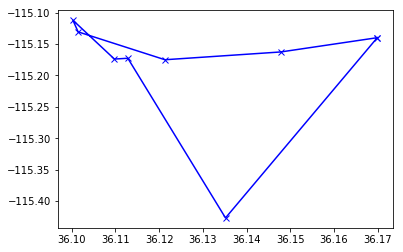

<Figure size 432x288 with 0 Axes>

In [52]:
# calculate how many POIs to recommend - for simplicity, have 1.5 hours per POI
if not user_input["categories"]:
    no_poi = ((user_input["end_time"] - user_input["start_time"]) // 1.5)
    categories_to_recommend = random.sample(list(category.keys()), no_poi)
else:
    categories_to_recommend = list(user_input["categories"])
        
score = [d for d in score if d['category'] in categories_to_recommend]

# create new list starting user dictionary and append result
user_loc = {'latitude': user_input['location'][0], 'longitude': user_input['location'][1]}
score.insert(0, user_loc)
    
# route optimization
pois = [(d['latitude'], d['longitude']) for d in score]
no_poi = len(pois)
tour = random.sample(range(no_poi), no_poi)
    
# rescale
xmin = min(pair[0] for pair in pois)
xmax = max(pair[0] for pair in pois)
ymin = min(pair[1] for pair in pois)
ymax = max(pair[1] for pair in pois)
    
def transform(pair):
    x = pair[0]
    y = pair[1]
    return [(x-xmin)*100/(xmax - xmin), (y-ymin)*100/(ymax - ymin)]
    
pois_rescaled = [transform(b) for b in pois]
    
for temperature in np.logspace(0, 5, num=100000)[::-1]:
    [i,j] = sorted(random.sample(range(no_poi),2))
    newTour = tour[:i] + tour[j:j+1] + tour[i+1:j] + tour[i:i+1] + tour[j+1:]

    oldDistances = sum([math.sqrt(sum([(pois_rescaled[tour[(k+1) % no_poi]][d] - pois_rescaled[tour[k % no_poi]][d])**2 for d in [0,1]])) for k in [j,j-1,i,i-1]])
    newDistances = sum([math.sqrt(sum([(pois_rescaled[newTour[(k+1) % no_poi]][d] - pois_rescaled[newTour[k % no_poi]][d])**2 for d in [0,1]])) for k in [j,j-1,i,i-1]])

    if math.exp((oldDistances - newDistances) / temperature) > random.random():
        tour = copy.copy(newTour)
    
tour = list(np.roll(tour, -(tour.index(0))))
ordered_result = [score[i] for i in tour][1:]
    
plt.plot([pois[tour[i % no_poi]][0] for i in range(no_poi+1)], [pois[tour[i % no_poi]][1] for i in range(no_poi+1)], 'xb-')
plt.figure()

<Figure size 432x288 with 0 Axes>

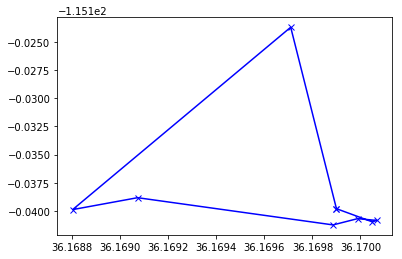

<Figure size 432x288 with 0 Axes>

In [53]:
# calculate how many POIs to recommend - for simplicity, have 1.5 hours per POI
if not user_input["categories"]:
    no_poi = ((user_input["end_time"] - user_input["start_time"]) // 1.5)
    categories_to_recommend = random.sample(list(category.keys()), no_poi)
else:
    categories_to_recommend = list(user_input["categories"])
        
distance = [d for d in distance if d['category'] in categories_to_recommend]

# create new list starting user dictionary and append result
user_loc = {'latitude': user_input['location'][0], 'longitude': user_input['location'][1]}
distance.insert(0, user_loc)
    
# route optimization
pois = [(d['latitude'], d['longitude']) for d in distance]
no_poi = len(pois)
tour = random.sample(range(no_poi), no_poi)
    
# rescale
xmin = min(pair[0] for pair in pois)
xmax = max(pair[0] for pair in pois)
ymin = min(pair[1] for pair in pois)
ymax = max(pair[1] for pair in pois)
    
def transform(pair):
    x = pair[0]
    y = pair[1]
    return [(x-xmin)*100/(xmax - xmin), (y-ymin)*100/(ymax - ymin)]
    
pois_rescaled = [transform(b) for b in pois]
    
for temperature in np.logspace(0, 5, num=100000)[::-1]:
    [i,j] = sorted(random.sample(range(no_poi),2))
    newTour = tour[:i] + tour[j:j+1] + tour[i+1:j] + tour[i:i+1] + tour[j+1:]

    oldDistances = sum([math.sqrt(sum([(pois_rescaled[tour[(k+1) % no_poi]][d] - pois_rescaled[tour[k % no_poi]][d])**2 for d in [0,1]])) for k in [j,j-1,i,i-1]])
    newDistances = sum([math.sqrt(sum([(pois_rescaled[newTour[(k+1) % no_poi]][d] - pois_rescaled[newTour[k % no_poi]][d])**2 for d in [0,1]])) for k in [j,j-1,i,i-1]])

    if math.exp((oldDistances - newDistances) / temperature) > random.random():
        tour = copy.copy(newTour)
    
tour = list(np.roll(tour, -(tour.index(0))))
ordered_result = [distance[i] for i in tour][1:]
    
plt.plot([pois[tour[i % no_poi]][0] for i in range(no_poi+1)], [pois[tour[i % no_poi]][1] for i in range(no_poi+1)], 'xb-')
plt.figure()

In [48]:
# choose category based on user_input and return top of the list

def final_recommendation(user_input, result):
    """
    user_input: dictionary of input retreived from user
    category: dictionary containing category label and refined recommendation as dataframe 
    """
    
    # calculate how many POIs to recommend - for simplicity, have 1.5 hours per POI
    if not user_input["categories"]:
        no_poi = ((user_input["end_time"] - user_input["start_time"]) // 1.5)
        categories_to_recommend = random.sample(list(category.keys()), no_poi)
    else:
        categories_to_recommend = list(user_input["categories"])
        
    result = [d for d in result if d['category'] in categories_to_recommend]

    # create new list starting user dictionary and append result
    user_loc = {'latitude': user_input['location'][0], 'longitude': user_input['location'][1]}
    result.insert(0, user_loc)
    
    # route optimization
    pois = [(d['latitude'], d['longitude']) for d in result]
    no_poi = len(pois)
    tour = random.sample(range(no_poi), no_poi)
    
    # rescale
    xmin = min(pair[0] for pair in pois)
    xmax = max(pair[0] for pair in pois)
    ymin = min(pair[1] for pair in pois)
    ymax = max(pair[1] for pair in pois)
    
    def transform(pair):
        x = pair[0]
        y = pair[1]
        return [(x-xmin)*100/(xmax - xmin), (y-ymin)*100/(ymax - ymin)]
    
    pois_rescaled = [transform(b) for b in pois]
    
    for temperature in np.logspace(0, 5, num=100000)[::-1]:
        [i,j] = sorted(random.sample(range(no_poi),2))
        newTour = tour[:i] + tour[j:j+1] + tour[i+1:j] + tour[i:i+1] + tour[j+1:]

        oldDistances = sum([math.sqrt(sum([(pois_rescaled[tour[(k+1) % no_poi]][d] - pois_rescaled[tour[k % no_poi]][d])**2 for d in [0,1]])) for k in [j,j-1,i,i-1]])
        newDistances = sum([math.sqrt(sum([(pois_rescaled[newTour[(k+1) % no_poi]][d] - pois_rescaled[newTour[k % no_poi]][d])**2 for d in [0,1]])) for k in [j,j-1,i,i-1]])

        if math.exp((oldDistances - newDistances) / temperature) > random.random():
            tour = copy.copy(newTour)
    
    tour = list(np.roll(tour, -(tour.index(0))))
    ordered_result = [result[i] for i in tour][1:]
    
    plt.plot([pois[tour[i % no_poi]][0] for i in range(no_poi+1)], [pois[tour[i % no_poi]][1] for i in range(no_poi+1)], 'xb-')
    plt.figure()
            
    return ordered_result

[{'category': 'active',
  'name': 'Red Rock Canyon',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1351760705,
  'longitude': -115.427117132},
 {'category': 'casinos',
  'name': 'The Cosmopolitan of Las Vegas',
  'stars': 4.0,
  'price': 3.0,
  'latitude': 36.109755299999996,
  'longitude': -115.17387690000001},
 {'category': 'coffee',
  'name': 'Dutch Bros. Coffee',
  'stars': 4.5,
  'price': 1.0,
  'latitude': 36.1002631,
  'longitude': -115.1119957},
 {'category': 'museums',
  'name': 'Pinball Hall Of Fame',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1014493,
  'longitude': -115.13051100000001},
 {'category': 'restaurants',
  'name': 'Mon Ami Gabi',
  'stars': 4.0,
  'price': 2.0,
  'latitude': 36.1128270642,
  'longitude': -115.17258149700001},
 {'category': 'arts',
  'name': 'Cirque du Soleil - The Beatles LOVE',
  'stars': 4.5,
  'price': nan,
  'latitude': 36.1213235673,
  'longitude': -115.17495632200001},
 {'category': 'tours',
  'name': 'Presidential Limousine',
  's

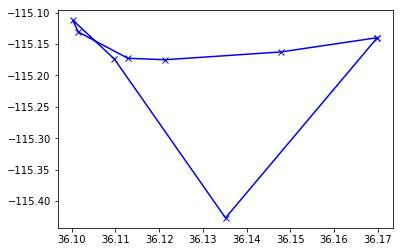

<Figure size 432x288 with 0 Axes>

In [49]:
final_recommendation(user_input, score)

In [151]:
final_recommendation(user_input, distance)

[{'category': 'active',
  'name': 'The Nerd',
  'stars': 3.0,
  'price': 2.0,
  'latitude': 36.170048211,
  'longitude': -115.14095965799999},
 {'category': 'museums',
  'name': 'Metropolitan Gallery and Art Museum Las Vegas',
  'stars': 5.0,
  'price': nan,
  'latitude': 36.170069,
  'longitude': -115.140844},
 {'category': 'arts',
  'name': 'Axehole Vegas',
  'stars': 5.0,
  'price': nan,
  'latitude': 36.169987899999995,
  'longitude': -115.1406844},
 {'category': 'tours',
  'name': 'Vegas Hikes',
  'stars': 5.0,
  'price': nan,
  'latitude': 36.169941200000004,
  'longitude': -115.13982959999998},
 {'category': 'casinos',
  'name': 'El Cortez Hotel & Casino',
  'stars': 3.0,
  'price': 1.0,
  'latitude': 36.1690720933,
  'longitude': -115.138824105},
 {'category': 'restaurants',
  'name': 'Le Thai',
  'stars': 4.0,
  'price': 2.0,
  'latitude': 36.1688018067,
  'longitude': -115.139880089},
 {'category': 'coffee',
  'name': 'Blitz Boba',
  'stars': 5.0,
  'price': 1.0,
  'latitude'

In [59]:
final_recommendation(user_input, score)

{'restaurants':                                 name  stars  price     score  distance  \
 business_id                                                              
 4JNXUYY8wbaaDmk3BPzlWw  Mon Ami Gabi    4.0    2.0  4.313279  6.995707   
 
                         score_weighted   latitude   longitude  
 business_id                                                    
 4JNXUYY8wbaaDmk3BPzlWw         0.49081  36.112827 -115.172581  ,
 'museums':                                         name  stars  price   score  distance  \
 business_id                                                                    
 8mIrX_LrOnAqWsB5JrOojQ  Pinball Hall Of Fame    4.5    NaN  5346.0  7.656957   
 
                         score_weighted   latitude   longitude  
 business_id                                                    
 8mIrX_LrOnAqWsB5JrOojQ      618.117728  36.101449 -115.130511  ,
 'coffee':                                       name  stars  price   score  distance  \
 business_id         

In [30]:
# original score_weighted
reco_restaurants_final

,name,stars,price,score,distance,score_weighted,postal_code,latitude,longitude
business_id,,,,,,,,,
-ed0Yc9on37RoIoG2ZgxBA,Le Thai,4.0,2.0,1.365654,0.122325,8.393213,89101.0,36.168802,-115.139880
3GEEy7RP6e4bT4LAiWFMFQ,Pizza Rock,4.0,2.0,1.549080,0.292472,4.047726,89101.0,36.171618,-115.142267
l_GV0hgEoTUf70uJVT0_hg,Eat.,4.0,2.0,1.626102,0.361604,3.477339,89101.0,36.166723,-115.138940
2sx52lDoiEtef7xgPCaoBw,VegeNation,4.5,2.0,1.229299,0.294034,2.915366,89101.0,36.167285,-115.139310
RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,4.0,3.0,4.307117,6.816663,0.575191,89109.0,36.116113,-115.176222
4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,4.0,2.0,4.313279,6.995707,0.561338,89109.0,36.112827,-115.172581
CiYLq33nAyghFkUR15pP-Q,Tacos El Gordo,4.0,1.0,1.331759,1.740355,0.543182,89104.0,36.158475,-115.126549
f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,4.0,2.0,3.210486,6.420006,0.439786,89109.0,36.118181,-115.171580
K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3.5,3.0,3.647002,7.462598,0.436836,89109.0,36.109550,-115.176155


In [33]:
# adjusted score_weighted
reco_restaurants_final

,name,stars,price,score,distance,score_weighted,postal_code,latitude,longitude
business_id,,,,,,,,,
l_GV0hgEoTUf70uJVT0_hg,Eat.,4.0,2.0,1.626102,0.361604,0.912089,89101.0,36.166723,-115.138940
3GEEy7RP6e4bT4LAiWFMFQ,Pizza Rock,4.0,2.0,1.549080,0.292472,0.901232,89101.0,36.171618,-115.142267
-ed0Yc9on37RoIoG2ZgxBA,Le Thai,4.0,2.0,1.365654,0.122325,0.874281,89101.0,36.168802,-115.139880
2sx52lDoiEtef7xgPCaoBw,VegeNation,4.5,2.0,1.229299,0.294034,0.651858,89101.0,36.167285,-115.139310
RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,4.0,3.0,4.307117,6.816663,0.501549,89109.0,36.116113,-115.176222
4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,4.0,2.0,4.313279,6.995707,0.491080,89109.0,36.112827,-115.172581
K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3.5,3.0,3.647002,7.462598,0.385179,89109.0,36.109550,-115.176155
f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,4.0,2.0,3.210486,6.420006,0.380468,89109.0,36.118181,-115.171580
2weQS-RnoOBhb1KsHKyoSQ,The Buffet,3.5,3.0,2.651347,5.313904,0.358542,89109.0,36.126887,-115.165590


In [36]:
# score_weighted version 3
reco_restaurants_final

,name,stars,price,score,distance,score_weighted,postal_code,latitude,longitude
business_id,,,,,,,,,
l_GV0hgEoTUf70uJVT0_hg,Eat.,4.0,2.0,1.626102,0.361604,1.067081,89101.0,36.166723,-115.138940
3GEEy7RP6e4bT4LAiWFMFQ,Pizza Rock,4.0,2.0,1.549080,0.292472,1.064564,89101.0,36.171618,-115.142267
-ed0Yc9on37RoIoG2ZgxBA,Le Thai,4.0,2.0,1.365654,0.122325,1.062520,89101.0,36.168802,-115.139880
wuQDMDlqM17jQNo0lYQZ7g,Park on Fremont,4.0,2.0,1.123826,0.069170,0.889142,89101.0,36.169326,-115.140097
eJKnymd0BywNPrJw1IuXVw,Nacho Daddy Downtown,4.0,2.0,1.181753,0.168778,0.862926,89101.0,36.170307,-115.141611
y7Js-07RF8d3N_AEtaw2VQ,Heart Attack Grill,3.0,2.0,1.106794,0.104218,0.845492,89101.0,36.169400,-115.140782
UidEFF1WpnU4duev4fjPlQ,Therapy,4.0,2.0,1.069291,0.092835,0.819980,89101.0,36.169066,-115.139842
2sx52lDoiEtef7xgPCaoBw,VegeNation,4.5,2.0,1.229299,0.294034,0.816137,89101.0,36.167285,-115.139310
tQifTiY-vutj8orxcMJKfQ,Triple George Grill,4.0,2.0,1.099261,0.310862,0.706450,89101.0,36.171819,-115.142318


In [43]:
rec_score, rec_distance, rec_score_weighted = refine_recommendation(user_input, reco_restaurants)

In [44]:
rec_score

,name,stars,price,score,distance,score_weighted,postal_code,latitude,longitude
business_id,,,,,,,,,
4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,4.0,2.0,4.313279,6.995707,0.491080,89109.0,36.112827,-115.172581
RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,4.0,3.0,4.307117,6.816663,0.501549,89109.0,36.116113,-115.176222
K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3.5,3.0,3.647002,7.462598,0.385179,89109.0,36.109550,-115.176155
f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,4.0,2.0,3.210486,6.420006,0.380468,89109.0,36.118181,-115.171580
DkYS3arLOhA8si5uUEmHOw,Earl of Sandwich,4.5,1.0,2.995601,7.313358,0.313686,89109.0,36.109443,-115.171869
2weQS-RnoOBhb1KsHKyoSQ,The Buffet,3.5,3.0,2.651347,5.313904,0.358542,89109.0,36.126887,-115.165590
ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,3.0,2.573177,7.128440,0.268820,89109.0,36.113220,-115.176890
iCQpiavjjPzJ5_3gPD5Ebg,Secret Pizza,4.0,1.0,2.535069,7.358957,0.256839,89109.0,36.109837,-115.174212
hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,4.5,2.0,2.492569,6.860757,0.267719,89169.0,36.108898,-115.151261


In [45]:
rec_distance

,name,stars,price,score,distance,score_weighted,postal_code,latitude,longitude
business_id,,,,,,,,,
-ed0Yc9on37RoIoG2ZgxBA,Le Thai,4.0,2.0,1.365654,0.122325,0.874281,89101.0,36.168802,-115.139880
3GEEy7RP6e4bT4LAiWFMFQ,Pizza Rock,4.0,2.0,1.549080,0.292472,0.901232,89101.0,36.171618,-115.142267
2sx52lDoiEtef7xgPCaoBw,VegeNation,4.5,2.0,1.229299,0.294034,0.651858,89101.0,36.167285,-115.139310
l_GV0hgEoTUf70uJVT0_hg,Eat.,4.0,2.0,1.626102,0.361604,0.912089,89101.0,36.166723,-115.138940
CiYLq33nAyghFkUR15pP-Q,Tacos El Gordo,4.0,1.0,1.331759,1.740355,0.344528,89104.0,36.158475,-115.126549
EnCIojgP5KTr1leaysFE3A,Viva Las Arepas,4.5,1.0,1.244251,2.330001,0.257084,89104.0,36.151652,-115.152558
R_ZlcX46pPdjhjmfd043LA,Top of the World,4.0,4.0,1.267208,2.880853,0.226461,89104.0,36.147408,-115.155726
awI4hHMfa7H0Xf0-ChU5hg,The Oyster Bar,4.5,2.0,1.735179,4.216691,0.258215,89102.0,36.144205,-115.174341
XXW_OFaYQkkGOGniujZFHg,The Peppermill Restaurant & Fireside Lounge,4.0,2.0,2.085341,4.539435,0.306436,89109.0,36.133667,-115.163095


In [46]:
rec_score_weighted

,name,stars,price,score,distance,score_weighted,postal_code,latitude,longitude
business_id,,,,,,,,,
l_GV0hgEoTUf70uJVT0_hg,Eat.,4.0,2.0,1.626102,0.361604,0.912089,89101.0,36.166723,-115.138940
3GEEy7RP6e4bT4LAiWFMFQ,Pizza Rock,4.0,2.0,1.549080,0.292472,0.901232,89101.0,36.171618,-115.142267
-ed0Yc9on37RoIoG2ZgxBA,Le Thai,4.0,2.0,1.365654,0.122325,0.874281,89101.0,36.168802,-115.139880
2sx52lDoiEtef7xgPCaoBw,VegeNation,4.5,2.0,1.229299,0.294034,0.651858,89101.0,36.167285,-115.139310
RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,4.0,3.0,4.307117,6.816663,0.501549,89109.0,36.116113,-115.176222
4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,4.0,2.0,4.313279,6.995707,0.491080,89109.0,36.112827,-115.172581
K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,3.5,3.0,3.647002,7.462598,0.385179,89109.0,36.109550,-115.176155
f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,4.0,2.0,3.210486,6.420006,0.380468,89109.0,36.118181,-115.171580
2weQS-RnoOBhb1KsHKyoSQ,The Buffet,3.5,3.0,2.651347,5.313904,0.358542,89109.0,36.126887,-115.165590


In [49]:
reco_active_final = refine_recommendation(user_input, reco_active)
reco_arts_final = refine_recommendation(user_input, reco_arts)
reco_casinos_final = refine_recommendation(user_input, reco_casinos)
reco_coffee_final = refine_recommendation(user_input, reco_coffee)
reco_museums_final = refine_recommendation(user_input, reco_museums)
reco_shopping_final = refine_recommendation(user_input, reco_shopping)
reco_tours_final = refine_recommendation(user_input, reco_tours)

In [50]:
recommendation2 = [reco_active_final,
                  reco_arts_final,
                  reco_casinos_final,
                  reco_coffee_final,
                  reco_museums_final,
                  reco_restaurants_final,
                  reco_shopping_final,
                  reco_tours_final]

In [51]:
category = {
    "active": reco_active_final,
    "arts": reco_arts_final,
    "casinos": reco_casinos_final,
    "coffee": reco_coffee_final,
    "museums": reco_museums_final,
    "restaurants": reco_restaurants_final,
    "shopping": reco_shopping_final,
    "tours": reco_tours_final
    }

### Fetch other categories

In [77]:
# choose category based on user_input and return top of the list

def final_recommendation(user_input, category):
    """
    user_input: dictionary of input retreived from user
    category: dictionary containing category label and refined recommendation as dataframe 
    """
    
    # initiate final result
    #final = {}
    final = []
    
    # calculate how many POIs to recommend - for simplicity, have 1.5 hours per POI
    no_poi = ((user_input["end_time"] - user_input["start_time"]) // 1.5)
    
    if not user_input["categories"]:
        categories_to_recommend = random.sample(list(category.keys()), no_poi)
    else:
        categories_to_recommend = list(user_input["categories"])
        
    for i in categories_to_recommend:
        # fetch top of the list
        #final.append(pd.Series(category[i][["name", "postal_code", "latitude", "longitude"]].iloc[0,]))
        #final['category'] = i
        #final.append(category[i][["name", "postal_code", "latitude", "longitude"]].iloc[0,])
        #final[i] = category[i][["name", "postal_code", "latitude", "longitude"]].iloc[0,]
        
        final.append(category[i][["name", "stars", "price", "latitude", "longitude"]].iloc[0,])
    
    return [final[i] for i in [3, 4, 2, 1, 0]]

In [78]:
reco_final = final_recommendation(user_input, category)

In [79]:
reco_final

[name         Golden Nugget
 stars                    3
 price                    2
 latitude           36.1698
 longitude         -115.146
 Name: BIBWGO_r_1znnlmLbp4Nxg, dtype: object,
 name         Presidential Limousine
 stars                             4
 price                           NaN
 latitude                    36.1478
 longitude                  -115.163
 Name: wcLX8aToZJF4AR-qkpI2Ag, dtype: object,
 name         Dutch Bros. Coffee
 stars                       4.5
 price                         1
 latitude                36.1003
 longitude              -115.112
 Name: 9fTDeI6mApFX52qYJ8z0mw, dtype: object,
 name         The Mob Museum
 stars                   4.5
 price                   NaN
 latitude            36.1728
 longitude          -115.141
 Name: w-As0KSwy8pqMClOea-NLQ, dtype: object,
 name            Eat.
 stars              4
 price              2
 latitude     36.1667
 longitude   -115.139
 Name: l_GV0hgEoTUf70uJVT0_hg, dtype: object]

In [75]:
for i in range(len(reco_final)):
    print(f"{i}:\t{reco_final[i].name}\t{reco_final[i].stars}")

0:	BIBWGO_r_1znnlmLbp4Nxg	3.0
1:	wcLX8aToZJF4AR-qkpI2Ag	4.0
2:	9fTDeI6mApFX52qYJ8z0mw	4.5
3:	w-As0KSwy8pqMClOea-NLQ	4.5
4:	l_GV0hgEoTUf70uJVT0_hg	4.0


### Route Optimization

In [156]:
pois = list([(reco_final[i].latitude, reco_final[i].longitude) for i in user_input["categories"]])

NameError: name 'reco_final' is not defined

In [294]:
[reco_final[i].longitude for i in user_input["categories"]]

[-115.142267074,
 -115.1412426,
 -115.1119957,
 -115.138824105,
 -115.13842340000002]

In [283]:
pois

[(36.1716181087, -115.142267074),
 (36.1728147, -115.1412426),
 (36.1002631, -115.1119957),
 (36.1690720933, -115.138824105),
 (36.1675431, -115.13842340000002)]

In [155]:
rescaled_pois

NameError: name 'rescaled_pois' is not defined

In [154]:
no_poi = len(pois)
tour = random.sample(range(no_poi), no_poi)

# rescale

xmin = min(pair[0] for pair in pois)
xmax = max(pair[0] for pair in pois)

ymin = min(pair[1] for pair in pois)
ymax = max(pair[1] for pair in pois)

def transform(pair):
    x = pair[0]
    y = pair[1]
    return [(x-xmin)*100/(xmax - xmin), (y-ymin)*100/(ymax - ymin)]

rescaled_pois = [transform(b) for b in pois]

for temperature in np.logspace(0, 5, num=100000)[::-1]:
    [i,j] = sorted(random.sample(range(no_poi),2))
    newTour = tour[:i] + tour[j:j+1] + tour[i+1:j] + tour[i:i+1] + tour[j+1:]
    
    oldDistances = sum([math.sqrt(sum([(rescaled_pois[tour[(k+1) % no_poi]][d] - rescaled_pois[tour[k % no_poi]][d])**2 for d in [0,1]])) for k in [j,j-1,i,i-1]])
    newDistances = sum([math.sqrt(sum([(rescaled_pois[newTour[(k+1) % no_poi]][d] - rescaled_pois[newTour[k % no_poi]][d])**2 for d in [0,1]])) for k in [j,j-1,i,i-1]])

    if math.exp((oldDistances - newDistances) / temperature) > random.random():
        tour = copy.copy(newTour)
    
plt.plot([pois[tour[i % no_poi]][0] for i in range(no_poi+1)], [pois[tour[i % no_poi]][1] for i in range(no_poi+1)], 'xb-')
plt.figure()

NameError: name 'pois' is not defined

In [291]:
tour

[3, 4, 2, 1, 0]